# 1 - Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from numpy import mean
from tabulate import tabulate

pd.set_option('display.float_format', '{:.2f}'.format)

# 2 - Helper functions

## 2.1 Get data

In [2]:
def get_data (path):
    
    data = pd.read_csv(path)
    
    return data


## 2.2 Add columns and tabulation

In [3]:
def add_columns(data):
    
    #Tipo de imóvel baseado na quantidade de quartos
    data['domitory_type'] = data['bedrooms'].apply(lambda x: 'studio'     if x == 1 else
                                                             'apartament' if x == 2 else 'house')
    
    #Condição do imóvel
    data['condition_type'] = data['condition'].apply(lambda x: 'bad'     if  x <= 2 else 
                                                               'regular' if (x == 3) | (x == 4) else 'good')
    
    #Tamanho da sala
    data['size'] = data['sqft_living'].apply(lambda x: 'size 0' if  x <= 1427 else
                                                       'size 1' if (x > 1427) & (x <= 1910) else
                                                       'size 2' if (x > 1910) & (x <= 2550) else 'size 3')
    
    #Imóvel renovado ou não
    data['is_renovated'] = data['yr_renovated'].apply(lambda x: 'not renovated' if x == 0 else 'renovated')
    
    #Com ou sem vista para água
    data['is_waterfront'] = data['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')
    
    #Idade do imóvel baseado no ano de construção
    data['house_age'] = data['yr_built'].apply(lambda x: 'old' if x <= 2000 else 'new')
    
    #Extraindo o ano do campo "date"
    data['date'] = pd.to_datetime(data['date'], format= '%Y-%m-%d')
    data['yr_date'] = data['date'].apply(lambda x: x.year)
    
    #Extraindo o mês do campo "date"
    data['month_date'] = data['date'].apply(lambda x: x.month)
    
    return data

## 2.3 Plotting

In [4]:
def plot_bar(data, x, y, hue=None, palette=None, estimator=mean):
    
    sns.set_theme()
    fig, ax = plt.subplots(figsize=(10,8))
    sns.barplot(data=data, x=x, y=y, estimator=estimator, hue=hue, palette=palette,ax=ax)
    
    return None
    

def plot_bar_hist(data, x, y, hue=None):
    
    fig, ax = plt.subplots(ncols=2, figsize=(15,8))
    sns.barplot(data=data, x=x, y=y, hue=hue,ax=ax[0])
    sns.histplot(data=data, x=y, kde=True, hue=hue, ax=ax[1])
    
    plt.show()
    
    return None

def plot_count_hist(data, x, y, hue=None):
    
    fig, ax = plt.subplots(ncols=2, figsize=(15,8))
    sns.countplot(data=data, x=x, ax=ax[0])
    sns.histplot(data=data, x=y, kde=True, hue=hue, ax=ax[1])
        
    plt.show()
    
    return None
    
def plot_count_bar(data, x, y, hue=None, palette=None):
    
    fig, ax = plt.subplots(ncols=2, figsize=(15,8))
    sns.countplot(data=data, x=x, hue=hue, palette=palette, ax=ax[0])
    sns.barplot(data=data, x=x, y=y, estimator=mean, hue=hue, ax=ax[1])
    
    plt.show()
    
    return None

# 3 - Data description

## 3.1 Dataframe

In [5]:
# Carregando os dados
data = get_data('kc_house_data.csv')


#Adicionando colunas
add_columns(data)

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,domitory_type,condition_type,size,is_renovated,is_waterfront,house_age,yr_date,month_date
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,1340,5650,house,regular,size 0,not renovated,no,old,2014,10
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,1690,7639,house,regular,size 3,renovated,no,old,2014,12
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,2720,8062,apartament,regular,size 0,not renovated,no,old,2015,2
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,1360,5000,house,good,size 2,not renovated,no,old,2014,12
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,1800,7503,house,regular,size 1,not renovated,no,old,2015,2


## 3.2 Columns

In [6]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'domitory_type',
       'condition_type', 'size', 'is_renovated', 'is_waterfront', 'house_age',
       'yr_date', 'month_date'],
      dtype='object')

Descrição

    • id: Notação para cada imóvel
    • date: Data de venda da imóvel
    • price: Preço de venda da imóvel
    • bedrooms: Número de quartos
    • bathrooms: Número de banheiros
    • sqft_living: Metragem quadrada da sala de estar
    • sqrt_log: Metragem quadrada do lote
    • floors: Quantidade de andares
    • waterfront: Vista para a água
    • view: Foi visualizado
    • condition: Condição do imóvel
    • grade: Nota geral dada à unidade habitacional
    • sqft_above: Metragem quadrada do imóvel
    • sqft_basement: Metragem quadrada do porão
    • yr_built: Ano de construção
    • yr_renovated: Ano em que o imóvel foi reformado
    • zipcode: Código postal
    • lat: Latitude
    • long: Longitude
    • sqft_living15: Metragem quadrada da sala de estar em 2015 (implica em algumas renovações)
    • sqrt_lot15: Metragem quadrada do lote em 2015 (implica em algumas renovações)
    • dormitory_type: Classificação do imóvel baseado na quantidade de quartos
    • condition_type: Classificação da condição de conversação do imóvel
    • size: Classificação do tamanho do imóvel baseado no tamanho da sala de estar
    • is_renovated: Se o imóvel foi reformado ou não
    • is_waterfront: Se o imóvel possui vista para a água
    • house_age: Classificação do imóvel se é antigo (old) ou novo (new)
    • yr_date: Ano da data de venda do imóvel
    • month_date: Mês da data de venda do imóvel

## 3.3 Data dimension

In [7]:
print(f'A quantidade de linhas do dataframe é: {data.shape[0]}')
print(f'A quantidade de colunas do dataframe é: {data.shape[1]}')

A quantidade de linhas do dataframe é: 21613
A quantidade de colunas do dataframe é: 29


## 3.4 Data types

In [8]:
data.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
domitory_type             object
condition_type            object
size                      object
is_renovated              object
is_waterfront             object
house_age                 object
yr_date                    int64
month_date                 int64
dtype: object

# 4 - Hypotheses

- H1: Imóveis com vista para a água são 30% mais caros, na média
- H2: Imóveis com data de construção menor que 1955 são 50% mais baratos, na média
- H3: Imóveis sem porão, são 50% maiores que com porão
- H4: O crescimento do preço dos imóveis YoY é de 10%
- H5: Imóveis com 3 banheiros tem um crescimento MoM de 15%
- H6: A maioria dos imóveis com vista para a água possuem estado de conservação "good"
- H7: Imóveis mais novos possuem preço médio maior
- H8: Imóveis com 2 andares possuem preço médio maior que a mediana
- H9: Imóvel antigo com reforma feita, são mais caros que aqueles sem reforma
- H10: 

# 5 - Exploratory data analysis

## H1 - Imóveis com vista para a água são 30% mais caros, na média
Falso


Imóveis com vista para a água são 212.64% mais caros que os imóveis sem vista.


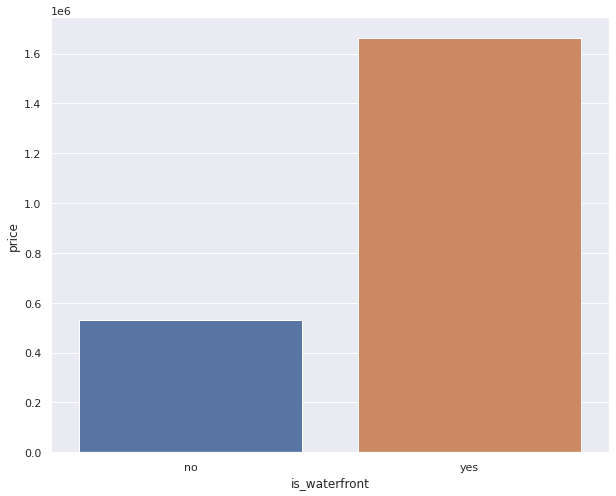

In [28]:
df1 = data.groupby('is_waterfront')['price'].mean().reset_index()
df1['%'] = df1['price'].pct_change()

porcen = (df1['%'][1])*100

print('\n'f'Imóveis com vista para a água são {porcen:.2f}% mais caros que os imóveis sem vista.')

plot_bar(df1, 'is_waterfront', 'price')

## H2 - Imóveis com data de construção menor que 1955 são 50% mais baratos, na média
Falso


Os imóveis com ano de construção menor que 1955 possuem valor 1.78% menor que os imóveis acima desse ano.


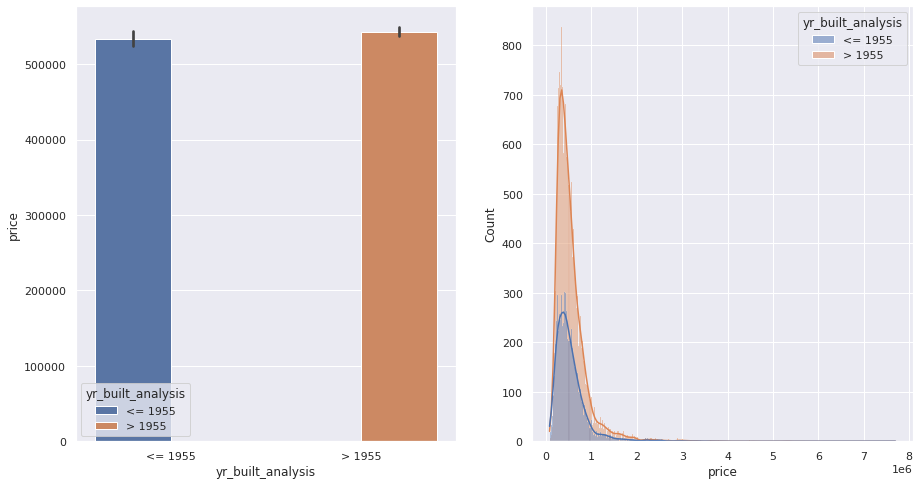

In [30]:
df2 = data.copy()
df2['yr_built_analysis'] = df2['yr_built'].apply(lambda x: '<= 1955' if x <= 1955 else '> 1955')

df2_aux = df2.groupby('yr_built_analysis')['price'].mean().reset_index()
df2_aux['%'] = df2_aux['price'].pct_change()

porcen_df2 = (df2_aux['%'][1])*100

print('\n'f'Os imóveis com ano de construção menor que 1955 possuem valor {porcen_df2:.2f}% menor que os imóveis acima desse ano.')

plot_bar_hist(df2, 'yr_built_analysis', 'price', 'yr_built_analysis')

## H3 - Imóveis sem porão são 50% maiores que com porão
Falso

A média do tamanho do imóvel sem porão é de: 1928.88
A média do tamanho do imóvel com porão é de: 1571.11

Imóveis sem porão são 22.77% maiores que imóveis com porão.


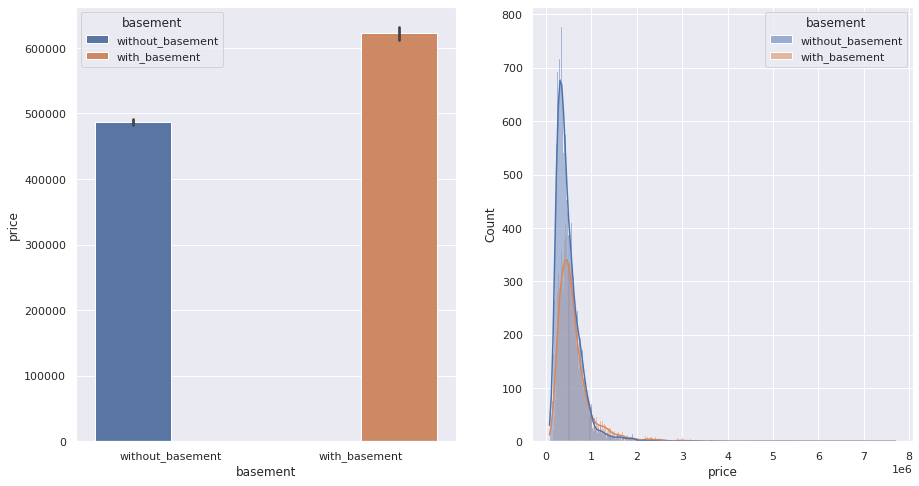

In [31]:
df3 = data.copy()
df3['basement'] = df3['sqft_basement'].apply(lambda x: 'without_basement' if x == 0 else 'with_basement')

no_basement = data.loc[data['sqft_basement'] == 0, 'sqft_above'].mean()
with_basement = data.loc[data['sqft_basement'] > 0, 'sqft_above'].mean()
dif = ((no_basement/with_basement)-1)*100

print(f'A média do tamanho do imóvel sem porão é de: {no_basement:.2f}')
print(f'A média do tamanho do imóvel com porão é de: {with_basement:.2f}')

print('\n'f'Imóveis sem porão são {dif:.2f}% maiores que imóveis com porão.')

plot_bar_hist(df3, 'basement', 'price', 'basement')

## H4 - O crescimento do preço dos imóveis YoY é de 10%
Falso


O crescimento do preço dos imóveis YoY é de 0.52%


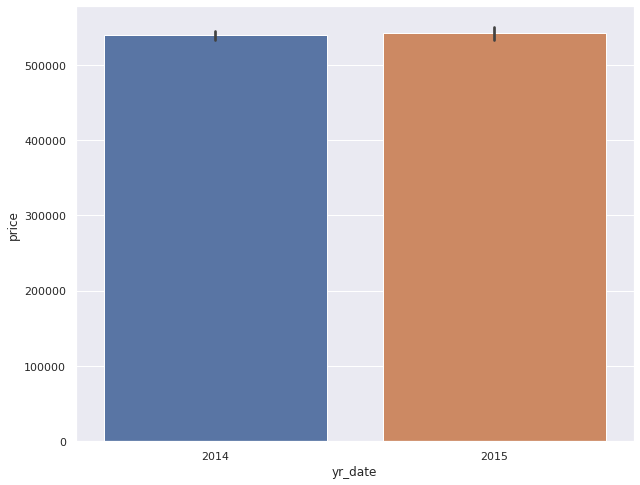

In [32]:
df4 = data.groupby('yr_date')['price'].mean().reset_index()
df4['%'] = df4['price'].pct_change()

dif_df4 = (df4['%'][1])*100

print('\n'f'O crescimento do preço dos imóveis YoY é de {dif_df4:.2f}%')

plot_bar(data, 'yr_date', 'price')

## H5 - Imóveis com 3 banheiros tem um crescimento MoM de 15%
 Falso

In [20]:
df5 = data.loc[data['bathrooms'] == 3]
df5_aux = df5.groupby('month_date')['price'].mean().reset_index()
df5_aux['%'] = df5_aux['price'].pct_change()
df5_aux['color'] = df5_aux['%'].apply(lambda x: 'negative' if x < 0 else 'positive')

df5_aux

,month_date,price,%,color
0,1,672923.17,NaN,positive
1,2,696714.42,0.04,positive
2,3,768495.10,0.10,positive
3,4,709751.99,-0.08,negative
4,5,689252.10,-0.03,negative
5,6,775057.56,0.12,positive
6,7,741405.04,-0.04,negative
7,8,737576.56,-0.01,negative
8,9,645246.89,-0.13,negative
9,10,645523.02,0.00,positive


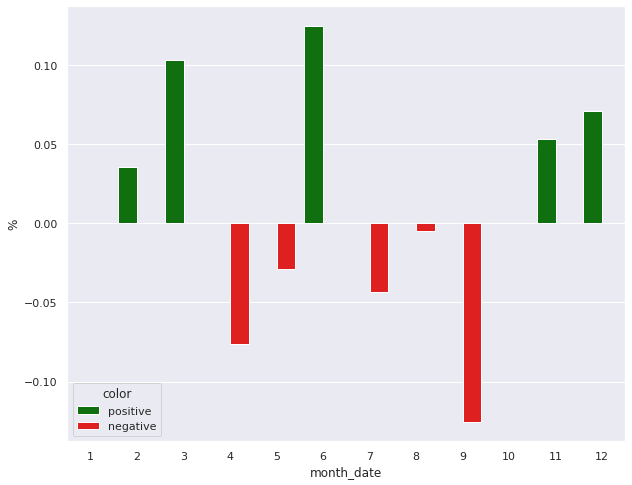

In [21]:
plot_bar(df5_aux, 'month_date', '%', 'color',['Green', 'Red'])

## H6 - A maioria dos imóveis com vista para a água possuem estado de conservação "good"
Falso

A quantidade de imóveis na condição "bad" é de 2
A quantidade de imóveis na condição "good" é de 20
A quantidade de imóveis na condição "regular" é de 141



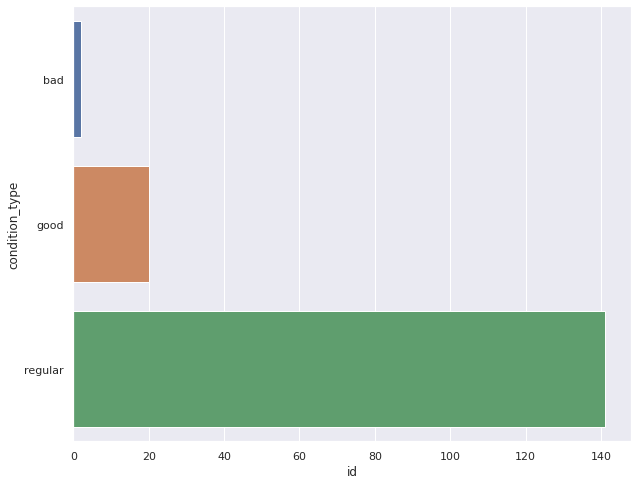

In [22]:
df6 = data.loc[data['is_waterfront'] == 'yes']
df6 = df6.groupby('condition_type')['id'].count().reset_index()

lista_id = list(df6['id'])

print(f'A quantidade de imóveis na condição "bad" é de {lista_id[0]}')
print(f'A quantidade de imóveis na condição "good" é de {lista_id[1]}')
print(f'A quantidade de imóveis na condição "regular" é de {lista_id[2]}''\n')

plot_bar(df6, 'id', 'condition_type')

## H7 - Imóveis mais novos possuem preço médio maior
Verdadeiro

A quantidade de imóveis "new" é 4541 e média dos preços é 615314.92
A quantidade de imóveis "old" é 17072 e a média dos preços é 520078.49



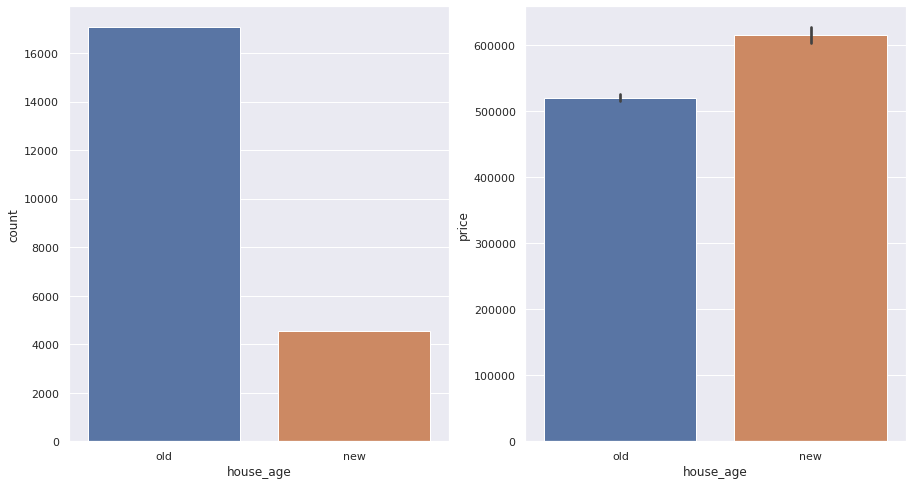

In [23]:
new = len(data.loc[data['house_age'] == 'new'])
old = len(data.loc[data['house_age'] == 'old'])
new_mean = data.loc[data['house_age'] == 'new', 'price'].mean()
old_mean = data.loc[data['house_age'] == 'old', 'price'].mean()

print(f'A quantidade de imóveis "new" é {new} e média dos preços é {new_mean:.2f}')
print(f'A quantidade de imóveis "old" é {old} e a média dos preços é {old_mean:.2f}''\n')

plot_count_bar(data, 'house_age', y='price')

## H8 - Imóveis com 2 andares possuem preço médio maior que a mediana
Verdadeiro

In [24]:
df8 = data.loc[data['floors'] == 2]
df8_median = np.median(df8['price'])
df8_mean =  np.mean(df8['price'])

print(f'Quantidade de imóveis com 2 andares: {len(df8)}')

print('\n'f'A mediana dos preços de imóveis com 2 andares: {df8_median:.2f}')
print(f'A média dos preços de imóveis com 2 andares: {df8_mean:.2f}''\n')

Quantidade de imóveis com 2 andares: 8241

A mediana dos preços de imóveis com 2 andares: 542950.00
A média dos preços de imóveis com 2 andares: 648891.16



## H9 - Imóvel antigo com reforma feita, são mais caros que aqueles sem reforma
Verdadeiro


Imóveis antigos com reforma, são 50.11% mais caros que aqueles sem reforma.



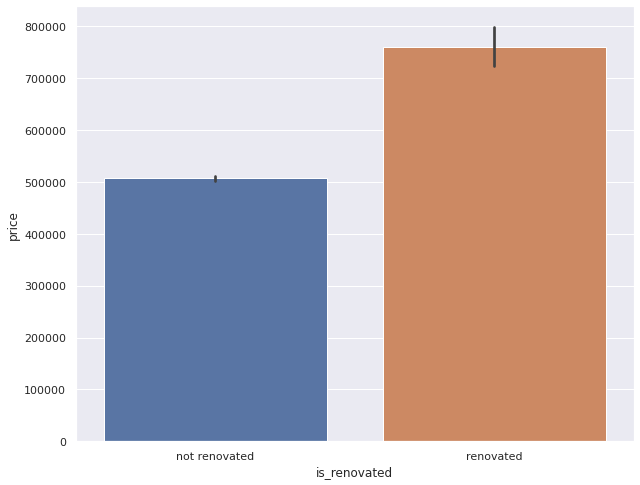

In [25]:
df9 = data.loc[(data['house_age'] == 'old')]
df9_aux = df9.groupby('is_renovated')['price'].mean().reset_index()
df9_aux['%'] = df9_aux['price'].pct_change()

porc_df9 = (df9_aux['%'][1])*100

print('\n'f'Imóveis antigos com reforma, são {porc_df9:.2f}% mais caros que aqueles sem reforma.''\n')

plot_bar(df9, 'is_renovated', 'price')

## H10 - A maioria dos imóveis do tipo "apartament" possuem estado de conservação "good" 
Falso


A quantidade de imóveis do tipo "apartament" em condições "bad": 63
A quantidade de imóveis do tipo "apartament" em condições "regular": 200
A quantidade de imóveis do tipo "apartament" em condições "good": 2497



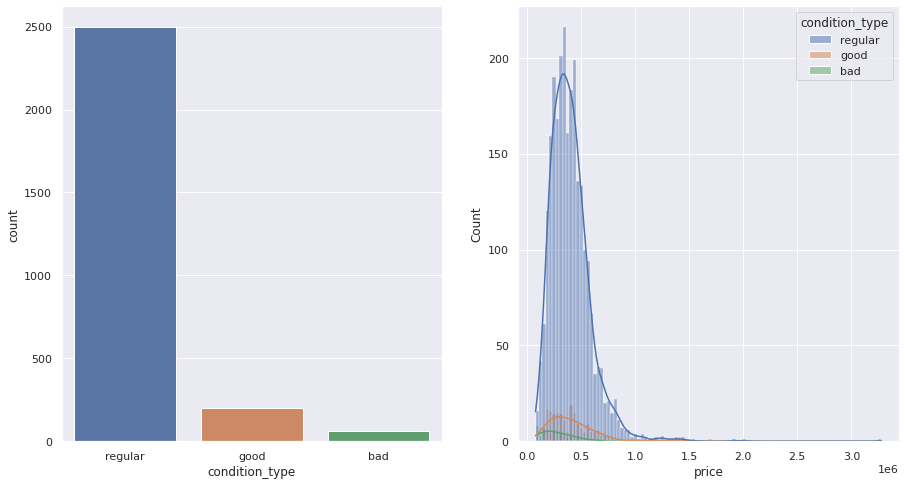

In [26]:
df10 = data.loc[data['domitory_type'] == 'apartament']
df10_aux = df10.groupby('condition_type')['id'].count().reset_index()

df10_count = list(df10_aux['id'])

print('\n'f'A quantidade de imóveis do tipo "apartament" em condições "bad": {df10_count[0]}')
print(f'A quantidade de imóveis do tipo "apartament" em condições "regular": {df10_count[1]}')
print(f'A quantidade de imóveis do tipo "apartament" em condições "good": {df10_count[2]}''\n')

plot_count_hist(df10, 'condition_type', 'price', 'condition_type')

## Hypotheses result 

In [27]:
tab = [['Hypotheses', 'Conclusion', 'Relevance'],
       ['H1', 'Falsa', 'Alta'],
       ['H2', 'Falsa', 'Alta'],
       ['H3', 'Falso', 'Média'],
       ['H4', 'Falso', 'Alta'],
       ['H5', 'Falso', 'Alta'],
       ['H6', 'Falso', 'Baixa'],
       ['H7', 'Verdadeira', 'Baixo'],
       ['H8', 'Verdadeira', 'Médio'],
       ['H9', 'Verdadeira', 'Alta'],
       ['H10', 'Falso', 'Media']
      ]
print(tabulate(tab, headers='firstrow'))

Hypotheses    Conclusion    Relevance
------------  ------------  -----------
H1            Falsa         Alta
H2            Falsa         Alta
H3            Falso         Média
H4            Falso         Alta
H5            Falso         Alta
H6            Falso         Baixa
H7            Verdadeira    Baixo
H8            Verdadeira    Médio
H9            Verdadeira    Alta
H10           Falso         Media
